<a href="https://colab.research.google.com/github/sharath0899/hds5210/blob/main/week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd

df = pd.read_csv("/content/covid_worldwide.csv")

In [2]:
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [3]:
# Display the number of rows and columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 231 rows and 8 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [4]:
unique_counts = df.nunique()

# Find the maximum and second-highest number of unique values
max_unique_values = unique_counts.max()
second_highest_unique_values = unique_counts[unique_counts < max_unique_values].max()

# Identify all columns with the maximum number of unique values
columns_with_max_unique = unique_counts[unique_counts == max_unique_values].index.tolist()

# Identify all columns with the second-highest number of unique values
columns_with_second_highest_unique = unique_counts[unique_counts == second_highest_unique_values].index.tolist()

# Display the results
print("Unique values in each column:")
print(unique_counts)
print(f"\nThe maximum number of unique values is {max_unique_values}.")
print(f"The columns with the maximum unique values are: {columns_with_max_unique}")
print(f"\nThe second-highest number of unique values is {second_highest_unique_values}.")
print(f"The columns with the second-highest unique values are: {columns_with_second_highest_unique}")

Unique values in each column:
Serial Number      231
Country            231
Total Cases        231
Total Deaths       213
Total Recovered    210
Active Cases       181
Total Test         212
Population         228
dtype: int64

The maximum number of unique values is 231.
The columns with the maximum unique values are: ['Serial Number', 'Country', 'Total Cases']

The second-highest number of unique values is 228.
The columns with the second-highest unique values are: ['Population']


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [5]:
# Find columns where all values are the same
redundant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Display the redundant columns
if redundant_columns:
    print(f"The following columns have the same value for every row: {redundant_columns}")
else:
    print("No redundant columns found where all values are the same.")

No redundant columns found where all values are the same.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [7]:
# List of columns to convert (identified as having numeric-like values)
columns_to_convert = ['Total Cases', 'Total Deaths', 'Total Recovered',
                      'Active Cases', 'Total Test', 'Population']

# Convert columns to numeric, coercing errors to NaN
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

# Display the converted dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    int64  
 3   Total Deaths     225 non-null    float64
 4   Total Recovered  210 non-null    float64
 5   Active Cases     212 non-null    float64
 6   Total Test       213 non-null    float64
 7   Population       228 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.6+ KB
None


In [8]:
import matplotlib.pyplot as plt

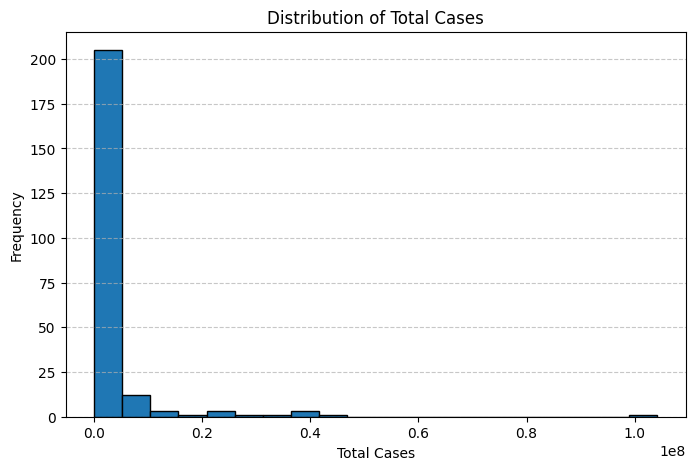

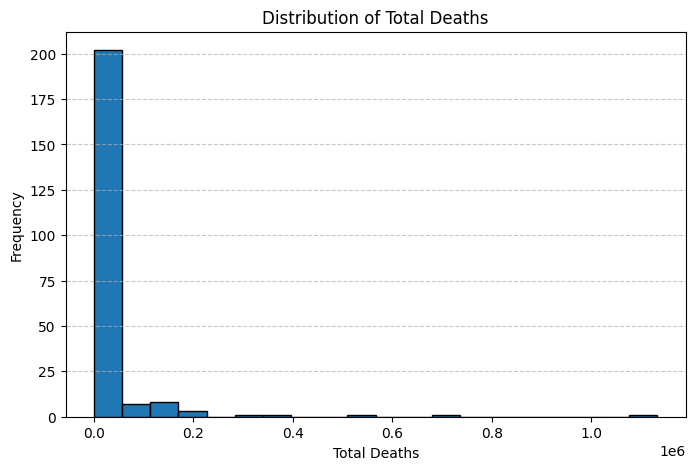

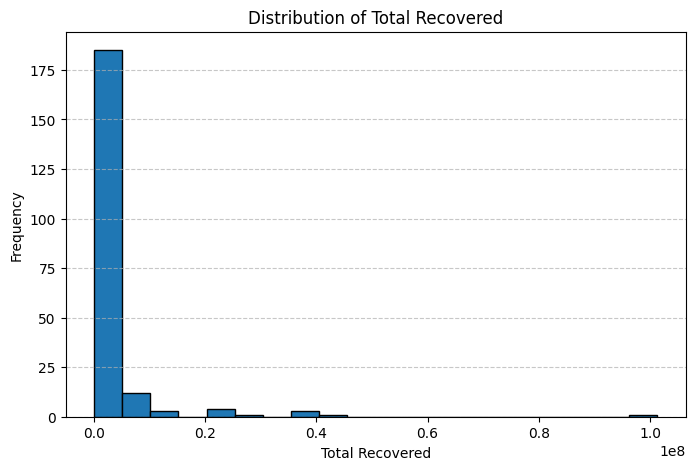

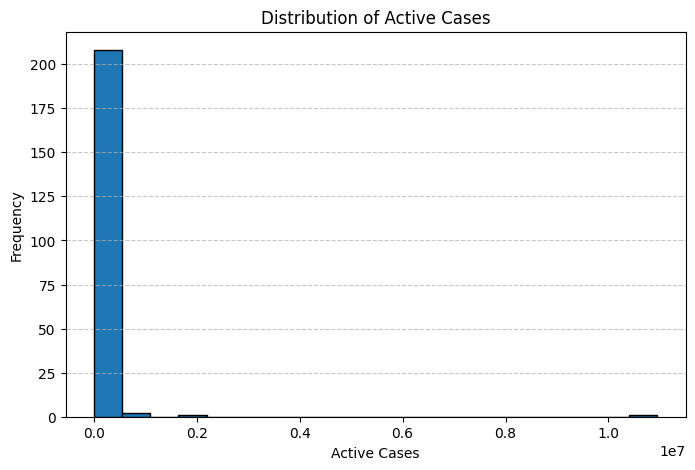

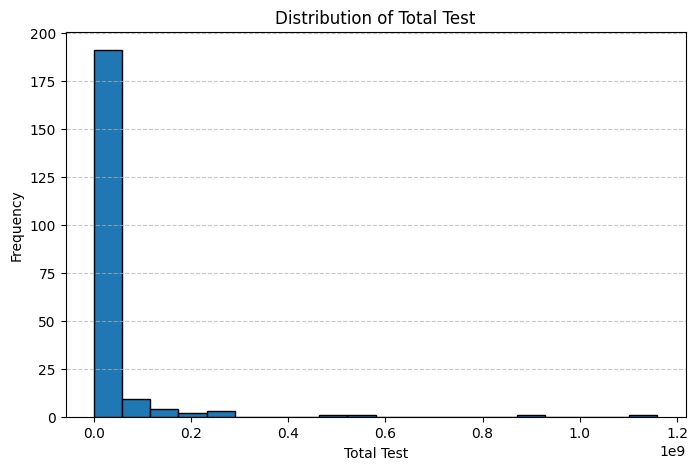

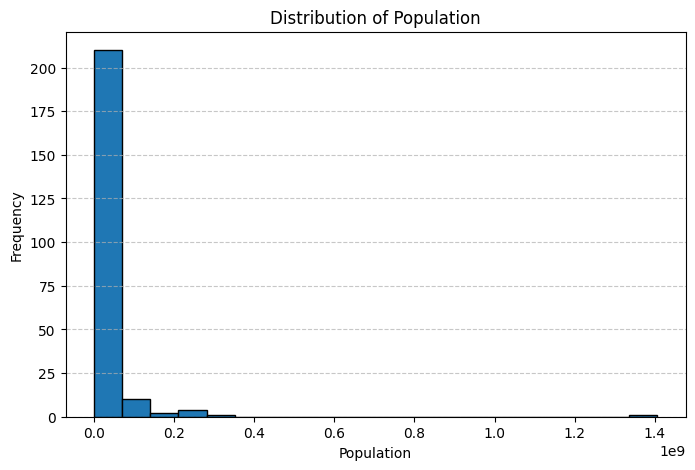

In [9]:
# Select numeric columns excluding 'Serial Number'
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Serial Number'], errors='ignore')

# Plot histograms for numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [10]:
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
1,2,India,44682784,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
2,3,France,39524311,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
3,4,Germany,37779833,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,5,Brazil,36824580,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08


In [11]:
df.isnull().sum()

,0
Serial Number,0
Country,0
Total Cases,0
Total Deaths,6
Total Recovered,21
Active Cases,19
Total Test,18
Population,3


In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of Missing Values:\n", missing_percentage)

# Fill missing values in 'Total Recovered', 'Active Cases', and 'Total Test' with their column mean
df['Total Recovered'] = df['Total Recovered'].fillna(df['Total Recovered'].mean())
df['Active Cases'] = df['Active Cases'].fillna(df['Active Cases'].mean())
df['Total Test'] = df['Total Test'].fillna(df['Total Test'].mean())

Percentage of Missing Values:
 Serial Number      0.000000
Country            0.000000
Total Cases        0.000000
Total Deaths       2.597403
Total Recovered    9.090909
Active Cases       8.225108
Total Test         7.792208
Population         1.298701
dtype: float64


In [13]:
# Drop rows with missing values in 'Population' (only 3 missing)
df = df.dropna(subset=['Population'])

In [14]:
# Verify if there are still missing values
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 Serial Number      0
Country            0
Total Cases        0
Total Deaths       6
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64


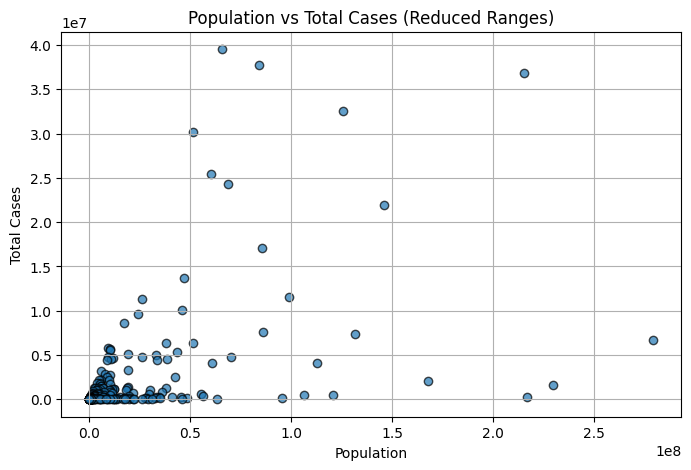

In [15]:
# Filter the data to reduce the range
filtered_data = df[(df['Population'] < 5e8) & (df['Total Cases'] < 5e7)]

# Scatter plot with reduced ranges
plt.figure(figsize=(8, 5))
plt.scatter(filtered_data['Population'], filtered_data['Total Cases'], alpha=0.7, edgecolor='k')
plt.title("Population vs Total Cases (Reduced Ranges)")
plt.xlabel("Population")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()


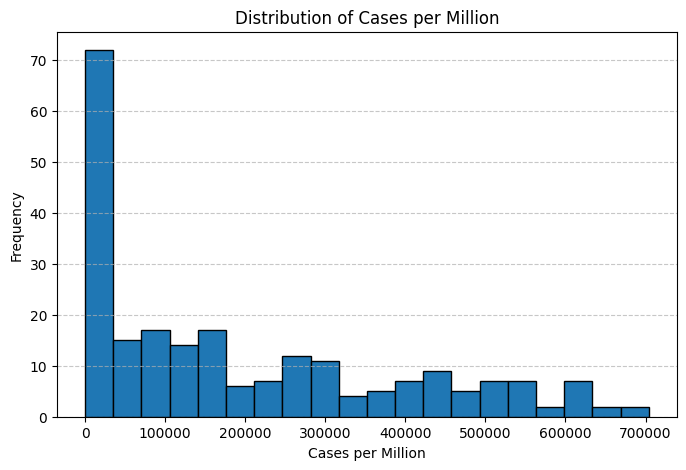

In [16]:
# Add new proportional metrics
df['Cases per Million'] = (df['Total Cases'] / df['Population']) * 1e6
df['Tests per Million'] = (df['Total Test'] / df['Population']) * 1e6

# Histogram of Cases per Million
plt.figure(figsize=(8, 5))
plt.hist(df['Cases per Million'], bins=20, edgecolor='black')
plt.title("Distribution of Cases per Million")
plt.xlabel("Cases per Million")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




---



## Submitting Your Work

Submit your work as usual.